# Übungsblatt 7

Lernziele:
- Ensemble Klassifikatoren



Schritt 1: Lesen Sie die Trainings-Daten aus 'data/2d_samples_4cl_train.csv' ein!

In [1]:
import pandas as pd

traindata = pd.read_csv('2d_samples_4cl_train.csv', header=0)
print(traindata.head())

# training data
X = traindata.iloc[:, [0, 1]].values
y = traindata.iloc[:, [2]].values.ravel()

        x1        x2 Label
0  25.5428   8.12002     A
1  28.7852  10.51880     A
2  31.1303   9.20584     B
3  31.1073   9.47408     B
4  31.2040   9.33927     B


Schritt 2: Lesen Sie die Test-Daten aus 'data/2d_samples_4cl_test.csv' ein!

In [2]:
import pandas as pd

testdata = pd.read_csv('2d_samples_4cl_test.csv', header=0)
print(testdata.head())

# training data
X_test = testdata.iloc[:, [0, 1]].values
y_test = testdata.iloc[:, [2]].values.ravel()

        x1        x2 Label
0  29.2656   4.81426     C
1  28.7640   8.50892     B
2  25.8326   4.19630     D
3  32.1170   9.08867     B
4  28.6760  10.74350     A


Schritt 3: Trainieren Sie einen Random Forest Klassifikator und testen Sie das Ergebnis an Hand der Test-Daten! 

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier(n_estimators=100, max_depth=8,random_state=0)
forest.fit(X,y)

y_pred = forest.predict(X_test)
result = confusion_matrix(y_test,y_pred)
print(result)

acc = accuracy_score(y_test,y_pred)
print(acc)

[[990   8   0   2]
 [ 18 481   1   0]
 [  0   1 247   2]
 [  2   0   3 245]]
0.9815


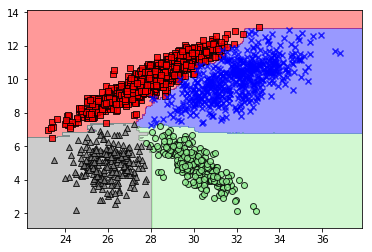

In [6]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # transform labels into numbers
    le = preprocessing.LabelEncoder()
    le.fit(y)

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = le.transform(Z)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=[cmap(idx)],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)
        
plot_decision_regions(X_test,y_pred,forest)

Schritt 4: Trainieren Sie ein Klassifikator-Ensemble mit Adaboost. Verwenden Sie als Base-Klassifikator einen Entscheidungsbaum. Vergleichen Sie das Ergebnis von AdaBoost mit dem Ergebnis von RandomForest.

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada = AdaBoostClassifier(n_estimators=100,base_estimator=DecisionTreeClassifier(max_depth=8))
ada.fit(X,y)

y_pred = ada.predict(X_test)
result = confusion_matrix(y_test,y_pred)
print(result)

acc = accuracy_score(y_test,y_pred)
print(acc)

[[990   9   0   1]
 [ 15 484   1   0]
 [  0   2 247   1]
 [  2   0   3 245]]
0.983
